In [4]:
import torch
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from torchvision import transforms
from EmotionDataset import EmotionDataset


   Unnamed: 0                     pth     label    relFCs
0           0  anger/image0000006.jpg  surprise  0.873142
1           1  anger/image0000060.jpg     anger  0.852311
2           2  anger/image0000061.jpg     anger  0.800957
3           3  anger/image0000066.jpg   disgust  0.843079
4           4  anger/image0000106.jpg     anger  0.849108
Example image shape: (96, 96, 3)


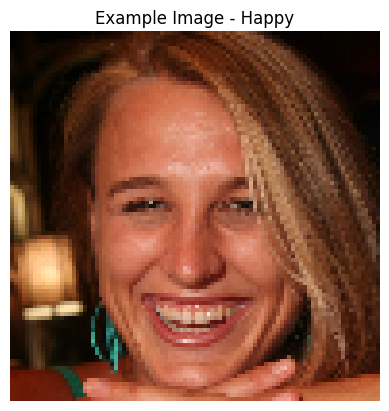

In [7]:
# Path to the dataset directory
dataset_path = 'data'

# Load the CSV file
labels_path = os.path.join(dataset_path, 'labels.csv')
labels_df = pd.read_csv(labels_path)

# Display the first few rows of the labels dataframe
print(labels_df.head())

# Function to read an image
def read_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Example of reading images from a specific folder
emotion_folder = os.path.join(dataset_path, 'happy')
example_image_path = os.path.join(emotion_folder, os.listdir(emotion_folder)[0])
example_image = read_image(example_image_path)

# Display the shape of the example image
print(f"Example image shape: {example_image.shape}")

# Example of displaying an image using matplotlib
plt.imshow(example_image)
plt.title('Example Image - Happy')
plt.axis('off')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('data/labels.csv')

# Extract labels from the 'pth' column and correct the image paths
df['label'] = df['pth'].apply(lambda x: x.split('/')[0])
df['pth'] = df['pth'].apply(lambda x: '/data/' + x)

# Drop unnecessary columns, specifically any that are not 'pth' or 'label'
df = df[['pth', 'label']]

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into training and testing sets (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the first few rows of the training and testing dataframes without index
print(train_df.head().to_string(index=False))
print(test_df.head().to_string(index=False))


                            pth    label
 /data/disgust/image0040359.jpg  disgust
/data/surprise/image0012737.jpg surprise
/data/surprise/image0034514.jpg surprise
   /data/anger/image0014769.jpg    anger
    /data/neutral/ffhq_5596.png  neutral
                            pth    label
/data/surprise/image0034809.jpg surprise
    /data/neutral/ffhq_4382.png  neutral
/data/surprise/image0032207.jpg surprise
/data/surprise/image0019031.jpg surprise
/data/surprise/image0018473.jpg surprise


In [ ]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Create dataset
train_dataset = EmotionDataset(train_df, transform=transform)